# Preparing the Data for Stock Market Analysis - Data Cleaning and Preprocessing

#  Introduction:


####  Author: "[  Yassine Sfaihi  ]"


In this notebook, I will be performing data cleaning and preprocessing on a dataset of stock market data. The goal of this step is to prepare the data for further analysis and visualization. This is just the first step in a multi-part analysis of the stock market and the cleaned data will be used in subsequent notebooks for exploratory data analysis (EDA) and modeling.

I will be using various techniques such as z-score normalization to handle outliers and missing data imputation to handle missing values. I will also be removing unnecessary columns and renaming columns to make the data more readable. By the end of this notebook, I will have a clean and ready-to-use dataset for my next steps in analyzing the stock market.

In [44]:
import pandas as pd

In [45]:
# reading in dataset
data = pd.read_csv("/home/yassine/Downloads/all_stocks_5yr.csv")

In [46]:
# displaying first 5 rows of data
print(data.head())

         date   open   high    low  close    volume Name

0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL

1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL

2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL

3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL

4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [47]:
# checking data types of columns
print(data.dtypes)

date       object

open      float64

high      float64

low       float64

close     float64

volume      int64

Name       object

dtype: object


#  Data preparation

#  Missing values

In [48]:
# checking for missing values
print(data.isnull().sum())

date       0

open      11

high       8

low        8

close      0

volume     0

Name       0

dtype: int64


In this case, we found that there were only 11 missing values in the 'open' column, 8 in the 'high' column, and 8 in the 'low' column. Since these missing values represent a very small proportion of the total number of observations in the dataset, which is approximately 690,000, it is reasonable to remove these rows from the dataset without significantly impacting the overall representativeness of the data. By removing the missing values, I am ensuring that my analysis is based on a complete and accurate dataset, which can improve the reliability and validity of my results.

In [49]:
# droping the rows with missing values of daily_return
data.dropna(inplace=True)

In [50]:
# checking for duplicate rows
duplicate_rows = data.duplicated()
print(duplicate_rows.sum())



0


In [51]:
# droping duplicate rows
data.drop_duplicates(inplace=True)


#  Outliers

#  Visualsing the outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Creating a counter to keep track of the current subplot
counter = 0
data_without_name = data.drop(columns=["Name","date"])

# Iterating through all columns of the dataframe
for column in data_without_name.columns:
    # Create a box plot for each column
    ax = axes[counter // 3, counter % 3]
    sns.boxplot(data[column], ax=ax)
    ax.set_title(f"Outliers in {column}")
    counter += 1

# Showing the plot
plt.show()



#  IQR method

The IQR method, also known as the Tukey method, is a method for identifying outliers in a dataset. It is based on the interquartile range, which is the difference between the 75th and 25th percentiles of the dataset. Data points that are outside of the range of 1.5IQR to 3IQR are considered outliers.

In [11]:
# Calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
df_out

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL
10,2013-02-25,13.60,13.76,13.00,13.02,7186400,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


#   z-score method

The z-score method is a statistical method for identifying outliers in a dataset. It calculates the difference between each data point and the mean of the dataset, in terms of the standard deviation of the dataset. Data points that have a z-score greater than a certain threshold (typically 3 or -3) are considered outliers.

In [ ]:
import numpy as np

# calculating the z-scores of the dataset
z_scores = np.abs(stats.zscore(data))

# seting a threshold for identifying outliers
threshold = 3

# identifing the outliers in the dataset
outliers = np.where(z_scores > threshold)

# removing the outliers from the dataset
dataset_no_outliers = data[(z_scores < threshold).all(axis=1)]


#  The Local Outlier Factor (LOF) method

The Local Outlier Factor (LOF) method, which is a density-based method for identifying outliers. The LOF algorithm calculates the local density deviation of a given data point with respect to its neighbors. A point with a high LOF score is considered an outlier, as it has a significantly lower density compared to its neighboring points. This method can be useful for detecting outliers in high-dimensional data.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Creating an instance of the LocalOutlierFactor class
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fiting the model to the data
lof.fit(data)

# Geting the outlier scores for each data point
scores = lof.negative_outlier_factor_

# Identifing the outliers based on a threshold value
outliers = data[scores < -threshold]


#  The Mahalanobis distance method

The Mahalanobis distance method, which takes into account the correlation between features. It calculates the distance of a given point from the mean of the data, but instead of using the standard Euclidean distance, it uses the Mahalanobis distance, which is a modified distance metric that takes into account the covariance structure of the data. Points that are far away from the mean using this distance metric are considered outliers. code for both

In [ ]:
from scipy.spatial.distance import Mahalanobis
from numpy import cov

# Calculating the mean and covariance of the data
mean = data.mean(axis=0)
covariance = cov(data.T)

# Creating an instance of the Mahalanobis class
mahalanobis = Mahalanobis(mean, covariance)

# Calculating the Mahalanobis distance for each data point
distances = mahalanobis(data)

# Identifing the outliers based on a threshold value
outliers = data[distances > threshold]


I am creating a new feature in the dataset called 'daily_return'. The feature is calculated by taking the percentage change of the 'close' column. The percentage change, also known as the relative change, is a common method used to measure the change in a value over time. It is calculated by subtracting the previous value from the current value, and then dividing by the previous value. By taking the percentage change of the 'close' column, I am able to measure the daily return of the stock, which can be useful for understanding the volatility and performance of the stock over time. This feature can be useful for further analysis, such as identifying trends or patterns in the stock's performance, or for evaluating the risk and return of the stock relative to other stocks or benchmarks.

#  Data consistency

In [52]:
# Checking that all dates are in the correct format
if not data['date'].str.match('\d{4}-\d{2}-\d{2}').all():
    print("Incorrect date format detected in the dataset.")
else: 
    print("NO Incorrect date format detected in the dataset.")

NO Incorrect date format detected in the dataset.


Checking that the volume of shares traded is not negative by using the .any() function to check if there are any negative values in the 'volume' column of the dataframe. 

In [53]:
# Checking that the volume of shares traded is not negative
if (data['volume'] < 0).any():
    print("Negative volume detected in the dataset.")
else: 
    print("NO Negative volume detected in the dataset.")

NO Negative volume detected in the dataset.


I am normalizing the 'close' and 'volume' columns by using standardization method, which makes the values of these columns have a mean of 0 and a standard deviation of 1. This makes data more comparable and consistent, which can help improve the accuracy and reliability of my analysis.

In [54]:
# normalizing the close and volume columns
data['close'] = (data['close'] - data['close'].mean()) / data['close'].std()
data['volume'] = (data['volume'] - data['volume'].mean()) / data['volume'].std()

#  Correlation

The correlation matrix is a square matrix where the diagonal elements are always 1 (because a variable is perfectly correlated with itself) and the off-diagonal elements are between -1 and 1. Positive values indicate a positive correlation, meaning that as one variable increases, the other variable also increases. Negative values indicate a negative correlation, meaning that as one variable increases, the other variable decreases. The closer the correlation coefficient is to 1 or -1, the stronger the correlation.

<AxesSubplot:>

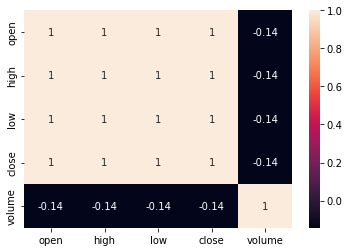

In [55]:
import seaborn as sns
corr = data.corr()

sns.heatmap(corr, annot=True)

#  Feature engineering Create additional features

In [15]:
# setting date column as index
data.set_index('date', inplace=True)


'price_change': This feature calculates the difference between the closing price and the opening price for a given day, and can be used to determine the overall change in price for that day.

In [56]:
#Create a new feature 'price_change'
data['price_change'] = data['close'] - data['open']

'returns': This feature calculates the percentage change in the closing price from one day to the next, and can be used to determine the overall change in price over time.

In [57]:
#Create a new feature 'returns'
data['returns'] = data['close'].pct_change()

'average_price': This feature calculates the average of the opening and closing prices for a given day, and can be used as a general indicator of the average price for that day.

In [58]:
#Create a new feature 'average_price'
data['average_price'] = (data['close'] + data['open']) / 2

'price_range': This feature calculates the difference between the highest and lowest prices for a given day, and can be used to determine the overall range of prices for that day.

In [59]:
#Create a new feature 'price_range'
data['price_range'] = data['high'] - data['low']

'volume_change': This feature calculates the difference in trading volume from one day to the next, and can be used to determine the overall change in trading volume over time.

In [60]:
#Create a new feature 'volume_change'
data['volume_change'] = data['volume'].diff()

'price_volume_correlation': This feature calculates the correlation coefficient between the closing price and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [61]:
#Create a new feature 'price_volume_correlation'
data['price_volume_correlation'] = data['close'].corr(data['volume'])

'returns_volume_correlation': This feature calculates the correlation coefficient between the returns and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [62]:
#Create a new feature 'returns_volume_correlation'
data['returns_volume_correlation'] = data['returns'].corr(data['volume'])

'price_volume_covariance': This feature calculates the covariance between the closing price and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [63]:
#Create a new feature 'price_volume_covariance'
data['price_volume_covariance'] = data['close'].cov(data['volume'])

'returns_volume_covariance': This feature calculates the covariance between the returns and trading volume for a given day, and can be used to determine the relationship between these two variables.

In [64]:
#Create a new feature 'returns_volume_covariance'
data['returns_volume_covariance'] = data['returns'].cov(data['volume'])

'moving_average_5', 'moving_average_10', 'moving_average_20': These features calculate the moving average of the closing price over the previous 5, 10 and 20 days respectively, and can be used as indicators of the overall trend in the closing price over time.

In [65]:
#Create a new feature 'moving_average_5'
data['moving_average_5'] = data['close'].rolling(window=5).mean()

In [66]:
#Create a new feature 'moving_average_10'
data['moving_average_10'] = data['close'].rolling(window=10).mean()

In [67]:
#Create a new feature 'moving_average_20'
data['moving_average_20'] = data['close'].rolling(window=20).mean()

'exponential_moving_average_5', 'exponential_moving_average_10', 'exponential_moving_average_20': These features calculate the exponential moving average of the closing price over the previous 5, 10 and 20 days respectively, and can be used as indicators of the overall trend in the closing price over time.

In [68]:
#Create a new feature 'exponential_moving_average_5'
data['exponential_moving_average_5'] = data['close'].ewm(span=5).mean()

In [69]:
#Create a new feature 'exponential_moving_average_10'
data['exponential_moving_average_10'] = data['close'].ewm(span=10).mean()

In [70]:
#Create a new feature 'exponential_moving_average_20'
data['exponential_moving_average_20'] = data['close'].ewm(span=20).mean()

'macd': This feature calculates the difference between the 12-day and 26-day exponential moving averages of the closing price, and can be used as an indicator of the overall trend in the closing price over time.

In [71]:
data['exponential_moving_average_12'] = data['close'].ewm(span=12).mean()
data['exponential_moving_average_26'] = data['close'].ewm(span=26).mean()


In [72]:
#Create a new feature 'macd'
data['macd'] = data['exponential_moving_average_12'] - data['exponential_moving_average_26']

'macd_signal': This feature calculates the 9-day moving average of the macd, and can be used as an indicator of the overall trend in the macd over time.

In [73]:
#Create a new feature 'macd_signal'
data['macd_signal'] = data['macd'].rolling(window=9).mean()

'macd_histogram': This feature calculates the difference between the macd and macd_signal, and can be used as an indicator of the overall trend in the macd over time.

In [74]:
#Create a new feature 'macd_histogram'
data['macd_histogram'] = data['macd'] - data['macd_signal']

'rsi': This feature calculates the relative strength index (RSI) which is a measure of the strength of a stock's price action. RSI ranges from 0 to 100 and is calculated as 100 - (100/(1+RS)) where RS = Average gain of up periods / Average loss of down periods.

In [75]:
#Create a new feature 'rsi'
gain = data['close'].diff()
gain[gain < 0] = 0
loss = - data['close'].diff()
loss[loss < 0] = 0
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss

In [79]:
data

,date,open,high,low,close,volume,Name,price_change,returns,average_price,...,moving_average_10,moving_average_20,exponential_moving_average_5,exponential_moving_average_10,exponential_moving_average_20,exponential_moving_average_12,exponential_moving_average_26,macd,macd_signal,macd_histogram
19,2013-03-08,14.99,15.20,14.84,-0.699498,0.721422,AAL,-15.689498,-0.001466,7.145251,...,-0.709981,-0.708867,-0.703775,-0.706829,-0.708357,-0.707392,-0.708599,0.001207,-0.000600,0.001807
20,2013-03-11,14.85,15.15,14.71,-0.697341,0.303659,AAL,-15.547341,-0.003083,7.076329,...,-0.707815,-0.708672,-0.701630,-0.705078,-0.707162,-0.705798,-0.707558,0.001760,-0.000235,0.001996
21,2013-03-12,15.14,15.60,14.95,-0.693542,0.538001,AAL,-15.833542,-0.005448,7.223229,...,-0.705515,-0.708138,-0.698934,-0.702955,-0.705704,-0.703863,-0.706286,0.002423,0.000200,0.002222
22,2013-03-13,15.54,16.20,15.48,-0.689332,0.811867,AAL,-16.229332,-0.006070,7.425334,...,-0.702948,-0.707296,-0.695733,-0.700453,-0.703971,-0.701579,-0.704772,0.003194,0.000715,0.002478
23,2013-03-14,15.98,16.36,15.93,-0.685841,0.467168,AAL,-16.665841,-0.005065,7.647080,...,-0.700052,-0.706480,-0.692435,-0.697775,-0.702073,-0.699113,-0.703107,0.003995,0.001301,0.002694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,-0.053633,-0.154093,ZTS,-76.893633,-0.172651,38.393183,...,-0.050307,-0.067593,-0.052165,-0.054634,-0.066036,-0.056773,-0.072514,0.015742,0.017102,-0.001360
619036,2018-02-02,77.53,78.12,76.73,-0.064312,-0.198616,ZTS,-77.594312,0.199108,38.732844,...,-0.050142,-0.065411,-0.056214,-0.056394,-0.065872,-0.057932,-0.071907,0.013974,0.017031,-0.003057
619037,2018-02-05,76.64,76.92,73.18,-0.094603,-0.156420,ZTS,-76.734603,0.470997,38.272698,...,-0.053890,-0.065170,-0.069010,-0.063341,-0.068609,-0.063574,-0.073588,0.010014,0.016439,-0.006425
619038,2018-02-06,72.74,74.56,72.13,-0.100353,0.069295,ZTS,-72.840353,0.060782,36.319823,...,-0.058326,-0.065668,-0.079458,-0.070070,-0.071632,-0.069232,-0.075571,0.006338,0.015328,-0.008990


In [80]:
cleaned_data=data

In [81]:
# Printing a summary of the numerical columns in the cleaned dataset
cleaned_data.describe()

,open,high,low,close,volume,price_change,returns,average_price,price_range,volume_change,...,moving_average_10,moving_average_20,exponential_moving_average_5,exponential_moving_average_10,exponential_moving_average_20,exponential_moving_average_12,exponential_moving_average_26,macd,macd_signal,macd_histogram
count,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,6.190100e+05,...,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,619010.000000,6.190100e+05
mean,83.025452,83.780551,82.258306,0.000022,-0.000022,-83.025430,0.002371,41.512737,1.522246,-8.529990e-07,...,0.000017,0.000012,0.000020,0.000017,0.000012,0.000016,0.000009,0.000007,0.000007,7.040194e-08
std,97.379514,98.208488,96.508367,1.000008,1.000001,96.379635,4.347456,49.189697,2.172654,5.083138e-01,...,0.997968,0.995823,0.998526,0.996917,0.993834,0.996286,0.992060,0.055660,0.053883,2.047857e-02
min,1.620000,1.690000,1.500000,-0.836371,-0.497119,-2023.813342,-605.147610,0.392738,-0.255000,-5.426162e+01,...,-0.834954,-0.834349,-0.835248,-0.834869,-0.834520,-0.834779,-0.834351,-5.228303,-5.011920,-2.964530e+00
25%,40.220000,40.620000,39.832400,-0.439406,-0.374015,-94.250902,-0.014250,19.891968,0.610000,-5.636025e-02,...,-0.438410,-0.437444,-0.438681,-0.437687,-0.435953,-0.437320,-0.434937,-0.004043,-0.003872,-2.062616e-03
50%,62.597500,63.157500,62.020000,-0.209709,-0.257639,-62.805068,-0.000317,31.192825,0.990000,-1.934798e-03,...,-0.208980,-0.208361,-0.209218,-0.208679,-0.208070,-0.208574,-0.207491,0.001853,0.001836,5.657910e-05
75%,94.370000,95.183750,93.540000,0.116714,-0.004333,-40.664037,0.013650,47.241548,1.669900,5.076756e-02,...,0.116106,0.115789,0.115897,0.115479,0.115354,0.115550,0.115050,0.008306,0.008104,2.289035e-03
max,2044.000000,2067.990000,2035.110000,20.186658,70.616398,-2.454523,1804.120932,1032.093329,138.260000,6.411544e+01,...,20.001021,19.721405,20.071672,19.959152,19.685934,19.906846,19.532225,1.862202,1.774762,1.035156e+00


In [82]:
# Printing a summary of the columns and their data types in the cleaned dataset
print(cleaned_data.info())


<class 'pandas.core.frame.DataFrame'>

Int64Index: 619010 entries, 19 to 619039

Data columns (total 27 columns):

 #   Column                         Non-Null Count   Dtype  

---  ------                         --------------   -----  

 0   date                           619010 non-null  object 

 1   open                           619010 non-null  float64

 2   high                           619010 non-null  float64

 3   low                            619010 non-null  float64

 4   close                          619010 non-null  float64

 5   volume                         619010 non-null  float64

 6   Name                           619010 non-null  object 

 7   price_change                   619010 non-null  float64

 8   returns                        619010 non-null  float64

 9   average_price                  619010 non-null  float64

 10  price_range                    619010 non-null  float64

 11  volume_change                  619010 non-null  float64

 12  price_volume

In [83]:
print(cleaned_data.isnull().sum())

date                             0

open                             0

high                             0

low                              0

close                            0

volume                           0

Name                             0

price_change                     0

returns                          0

average_price                    0

price_range                      0

volume_change                    0

price_volume_correlation         0

returns_volume_correlation       0

price_volume_covariance          0

returns_volume_covariance        0

moving_average_5                 0

moving_average_10                0

moving_average_20                0

exponential_moving_average_5     0

exponential_moving_average_10    0

exponential_moving_average_20    0

exponential_moving_average_12    0

exponential_moving_average_26    0

macd                             0

macd_signal                      0

macd_histogram                   0

dtype: int64


In [85]:
#saving the clean data
cleaned_data.to_csv("all_stocks_5yr_cleaned_data.csv", index=False)


#  Consultation for next step:


In the next notebook, I will be performing exploratory data analysis (EDA) on the cleaned dataset. I will be visualizing the data to gain insights and identify patterns in the stock market. This will include creating various plots such as line charts, histograms, and heatmaps, as well as calculating summary statistics. The EDA will give me a better understanding of the stock market and help inform my modeling decisions.